In [5]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [6]:
plt.rcParams["figure.figsize"] = (6,6)

In [7]:
import numpy as np
import torch
from sklearn import datasets

# Simple gradients on tensors

In [27]:
a = torch.ones((3,2), requires_grad=True)

In [28]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)

In [29]:
c = (5 * a).sum()

In [30]:
c

tensor(30., grad_fn=<SumBackward0>)

The function is this:

$$
c = \sum_{ij} 5a_{ij}
$$

The gradient:

$$
    \frac{\partial c}{\partial a_{ij}} = \frac{\partial}{\partial a_{ij}}\sum_{km} 5a_{km} = 5 \sum_{km} \delta_{ik}\delta_{mj}  = 5
$$

In [31]:
print(c)

tensor(30., grad_fn=<SumBackward0>)


In [32]:
a.grad is None

True

In [33]:
c.backward()

In [34]:
a.grad

tensor([[5., 5.],
        [5., 5.],
        [5., 5.]])

In [35]:
d = (a + a).sum()

In [36]:
d

tensor(12., grad_fn=<SumBackward0>)

In [37]:
d.backward()

In [38]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)

In [39]:
a.grad

tensor([[7., 7.],
        [7., 7.],
        [7., 7.]])

In [40]:
a.grad.zero_()
a.grad

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

# Logistic regression example

In [8]:
X, y = datasets.make_blobs(1000, centers=[[-3, -3], [0, 0]], cluster_std=1.25)

In [9]:
y

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [10]:
Xt = torch.tensor(X, dtype=torch.float)
yt = torch.tensor(np.expand_dims(y, axis=-1), dtype=torch.float)

Sigmoid activation function is defined as:
    
$$
\sigma (x) = \frac{1}{1+e^{-x}}
$$

Text(0.5, 1.0, 'Sigmoid function')

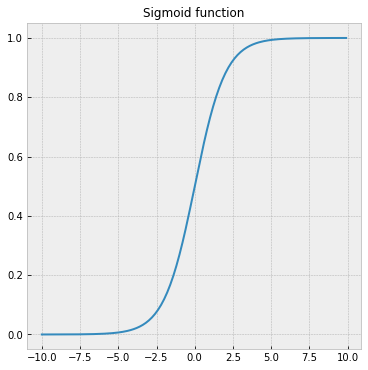

In [11]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, 1/(1+np.exp(-x)))
plt.title("Sigmoid function", fontsize=12)

In [12]:
def sigmoid(a):
    """Sigmoid activation function."""

    return 1/(1 + (-a).exp())

In [13]:
X

array([[-2.78049182, -2.40021354],
       [-0.96851358, -5.83741101],
       [-0.81037625, -4.1380727 ],
       ...,
       [-1.71176942, -2.33889785],
       [ 1.4127057 , -0.50259341],
       [-0.6389449 ,  1.96668044]])

In [14]:
W = torch.randn(2, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

In [15]:
W, b

(tensor([[-0.2391],
         [ 0.0690]], requires_grad=True),
 tensor([[0.5897]], requires_grad=True))

In [16]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

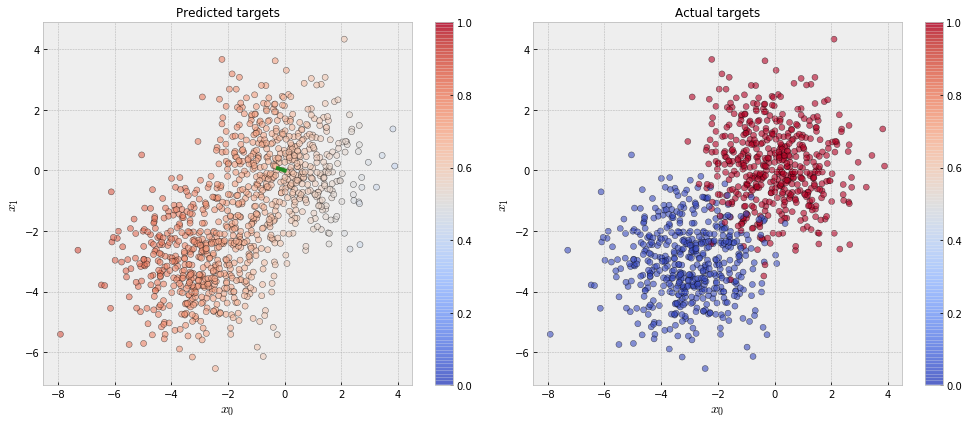

In [17]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

## Log-loss

$$
L = - \frac{1}{N} \sum_k \left(y_k \log\left(\hat y_k\right) + \left(1 - y_k\right) \log\left(1 - \hat y_k\right)\right)
$$

$$
\hat y_i = \sigma(X_{ik}W_{k}+b)
$$

In [18]:
def output(x, w, b):
    return sigmoid(torch.mm(x, w) + b)

def logloss(y, y_pred):
    return -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()

In [19]:
y

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [20]:
loss = logloss(yt, y_pred)
loss.item(), (-loss).exp().item()

(0.9255191087722778, 0.39632561802864075)

In [21]:
loss

tensor(0.9255, grad_fn=<NegBackward>)

In [22]:
loss.item()

0.9255191087722778

Estimate probability:

$$
L = - \frac{1}{N} \sum_k (y_k \log(\hat y_k) + (1 - y_k) \log(1 - \hat y_k)) = -\langle\log P\rangle \approx -\log \langle P\rangle
$$

Hence:

$$
\langle P\rangle \approx e^{-L}
$$


In [23]:
EPOCHS = 1000
LR = 1e-1
DELTA = 0.00001
loss_history = []

for i in range(EPOCHS):
    y_pred = output(Xt, W, b)
    loss = logloss(yt, y_pred)
    loss.backward()
    
    loss_history.append(loss.item())

    with torch.no_grad():
        W.sub_(LR * W.grad)
        b.sub_(LR * b.grad)
    W.grad.zero_()
    b.grad.zero_()

    if i % 20 == 0:
        print(f"Epoch {i}: loss = {loss_history[-1]}")
    
    try:
        if loss_history[-2] - loss_history[-1] < DELTA:
            break
    except:
        pass

Epoch 0: loss = 0.9255191087722778
Epoch 20: loss = 0.2866106331348419
Epoch 40: loss = 0.25131505727767944
Epoch 60: loss = 0.22771473228931427
Epoch 80: loss = 0.20995678007602692
Epoch 100: loss = 0.19607073068618774
Epoch 120: loss = 0.18491685390472412
Epoch 140: loss = 0.17576126754283905
Epoch 160: loss = 0.1681092381477356
Epoch 180: loss = 0.1616159975528717
Epoch 200: loss = 0.1560344696044922
Epoch 220: loss = 0.15118297934532166
Epoch 240: loss = 0.14692534506320953
Epoch 260: loss = 0.14315718412399292
Epoch 280: loss = 0.13979744911193848
Epoch 300: loss = 0.13678205013275146
Epoch 320: loss = 0.13405980169773102
Epoch 340: loss = 0.13158921897411346
Epoch 360: loss = 0.12933631241321564
Epoch 380: loss = 0.1272730529308319
Epoch 400: loss = 0.12537609040737152
Epoch 420: loss = 0.1236257255077362
Epoch 440: loss = 0.12200532853603363
Epoch 460: loss = 0.12050070613622665
Epoch 480: loss = 0.1190996915102005
Epoch 500: loss = 0.11779177188873291
Epoch 520: loss = 0.116567

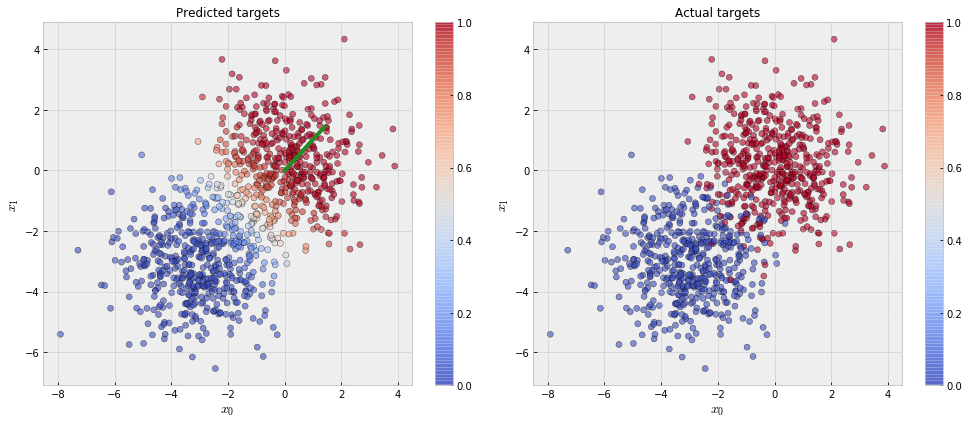

In [24]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [25]:
W, b

(tensor([[1.4014],
         [1.4318]], requires_grad=True),
 tensor([[3.8748]], requires_grad=True))

Text(0, 0.5, 'loss')

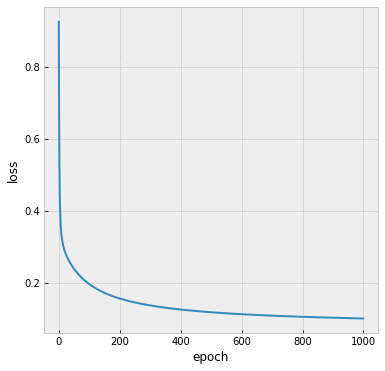

In [26]:
plt.figure(figsize=(6,6))
plt.plot(loss_history)
plt.xlabel("epoch")
plt.ylabel("loss")

In [30]:
y_ = y_pred.detach().numpy().flatten()

In [31]:
from sklearn.metrics import classification_report

In [32]:
y_class = (y_ >= 0.5).astype(np.int)

In [33]:
print(classification_report(y, y_class))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       500
           1       0.98      0.96      0.97       500

   micro avg       0.97      0.97      0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



(array([  2.,   1.,   5.,   6.,   8.,  15.,  12.,  19.,  39., 393.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

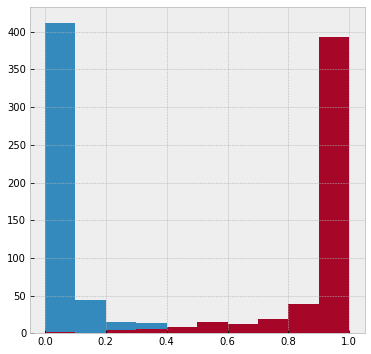

In [34]:
plt.hist(y_[y==0], range=(0,1))
plt.hist(y_[y==1], range=(0,1))

In [35]:
(y==0).mean()

0.5

In [36]:
y

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [37]:
y_pred

tensor([[3.0543e-02],
        [2.9025e-03],
        [3.9726e-02],
        [7.0834e-04],
        [9.8528e-01],
        [1.0975e-04],
        [1.1974e-02],
        [2.2594e-02],
        [1.4267e-04],
        [3.3196e-02],
        [9.9292e-01],
        [3.2911e-03],
        [4.3383e-03],
        [8.9858e-01],
        [1.2199e-03],
        [1.0000e+00],
        [5.0891e-01],
        [9.8989e-01],
        [6.9674e-01],
        [9.8795e-01],
        [1.2577e-05],
        [8.7904e-01],
        [5.6962e-05],
        [3.3051e-03],
        [3.2232e-01],
        [3.9915e-03],
        [3.7821e-03],
        [2.7946e-02],
        [9.9210e-01],
        [1.8391e-02],
        [1.8407e-03],
        [3.5833e-03],
        [9.9992e-01],
        [9.8821e-01],
        [9.8829e-01],
        [3.1797e-07],
        [6.9269e-02],
        [9.9223e-01],
        [2.6939e-04],
        [8.0008e-04],
        [3.4842e-02],
        [2.7360e-02],
        [8.9806e-01],
        [9.9453e-01],
        [9.5926e-01],
        [9